<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center>Тема 3. Задача класифікації, дерево рішень і метод найближчих сусідів</center>

## План

1. [Вступ](#1.-Вступ)
2. [Дерево рішень](#2.-Дерево-рішень)
3. [Метод найближчих сусідів](#3.-Метод-найближчих-сусідів)
4. [Вибір параметрів моделі і крос-валідація](#4.-Вибір-параметрів-моделі-і-крос-валідація)
5. [Приклади застосування та складні випадки](#5.-Приклади-застосування-та-складні-випадки)
6. [Плюси і мінуси дерев рішень та методу найближчих сусідів](#6.-Плюси-і-мінуси-дерев-рішень-та-методу-найближчих-сусідів)
7. [Корисні ресурси](#7.-Корисні-ресурси)

## 1. Вступ

Перші дві теми були присвячені попередньому аналізу даних з Pandas і побудові рисунків, що дозволяють робити висновки за даними. Перейдемо до машинного навчання. Не варто плутати такі поняття як *штучний інтелект*, *машинне навчання*, *нейронні мережі*. 

<img src='../img/ML01.jpg' width=60%>

*Штучний інтелект* – назва всієї області, як біологія або хімія.

*Машинне навчання* – це розділ штучного інтелекту. Важливий, але не єдиний. Вивчає методи побудови алгоритмів, здатних навчатися.

*Нейромережі* – один з типів машинного навчання. Популярний, але є й інші, не гірші.

*Глибоке навчання* – архітектура нейромереж, один з підходів до їх побудови та навчання.

Класичне, загальне (і не дуже строге) означення машинного навчання звучить так (T. Mitchell "Machine learning", 1997):
> Говорять, що комп'ютерна програма *навчається* при розв'язанні якоїсь задачі з класу T, якщо її продуктивність, згідно метрики P, поліпшується з накопиченням досвіду E.

Далі в різних сценаріях під T, P, і E маються на увазі зовсім різні речі. Серед найпопулярніших задач T в машинному навчанні:
 - класифікація – віднесення об'єкта до однієї з категорій на основі його ознак;
 - регресія – прогнозування кількісної ознаки об'єкта на основі інших його ознак;
 - кластеризація – розбиття множини об'єктів на групи на основі ознак цих об'єктів так, щоб всередині груп об'єкти були схожі між собою, а поза межами однієї групи – менш схожі;
 - детекція аномалій – пошук об'єктів, "сильно несхожих" на всі інші у вибірці або на якусь групу об'єктів;
 - і багато інших, більш специфічних. 
 
Хороший огляд проведено в главі "Machine Learning basics" книги ["Deep Learning"](http://www.deeplearningbook.org) (Ian Goodfellow, Yoshua Bengio, Aaron Courville, 2016).
 
Під досвідом E розуміються дані (без них нікуди), і в залежності від цього алгоритми машинного навчання можуть бути поділені на ті, що навчаються *з учителем* і *без учителя* (supervised & unsupervised learning). У задачах навчання без вчителя є вибірка, що складається з об'єктів, які описуються набором ознак. У задачах навчання з учителем на додачу до цього для кожного об'єкта деякої вибірки, яка називається *навчальною*, відома *цільова ознака* – по суті це те, що хотілося б прогнозувати для інших об'єктів, не з навчальної вибірки.

Карта світу машинного навчання
<img src='../img/ML02.jpg' width=70%>

#### Приклад
Задачі класифікації і регресії – це задачі навчання з учителем. Як приклад візьмемо задачу кредитного скорингу: на основі накопичених банком даних про своїх клієнтів хочеться прогнозувати неповернення кредиту. Тут для алгоритму досвід E – це наявна навчальна вибірка: набір об'єктів (людей), кожен з яких характеризується набором ознак (таких як вік, зарплата, тип кредиту, неповернення в минулому і т.д.), а також цільовою ознакою. Якщо ця цільова ознака – просто факт неповернення кредиту (1 або 0, тобто банк знає про своїх клієнтів, хто повернув кредит, а хто – ні), то це задача (бінарної) класифікації. Якщо відомо, на скільки по часу клієнт затягнув з поверненням кредиту і хочеться те ж саме прогнозувати для нових клієнтів, то це буде задача регресії.

Нарешті, третя абстракція у визначенні машинного навчання – це метрика оцінки продуктивності алгоритму P. Такі метрики розрізняються для різних задач і алгоритмів, і про них ми будимо говорити в міру вивчення алгоритмів. Поки скажемо, що найпростіша метрика якості алгоритму, який розв'язує задачу класифікації – це частка правильних відповідей (*accuracy*, не називайте її *точністю*, цей переклад зарезервований під іншу метрику, *precision*) – тобто просто частка вірних прогнозів алгоритму на тестовій вибірці.

Далі будемо говорити про дві задачі навчання з учителем: про класифікацію і регреcію.

---

### Означення та основні поняття
([Математические методы обучения по прецедентам, К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf))

Задано множину об'єктів $X$ (ознакові описи об'єктів), множину допустимих відповідей $Y$ (значення цільової ознаки), і існує цільова функція (target function) $y^*: X \rightarrow Y$, значення якої $y_i = y^*(x_i)$ відомі тільки на скінченній підмножині об'єктів $\{x_1,\ldots , x_\ell\} \subset X$. Сукупність пар $X^\ell = (x_i, y_i)_{i = 1}^\ell$ називається *навчальною вибіркою* (training sample).

Задача навчання з учителем полягає в тому, щоб за вибіркою $X^\ell$ відновити залежність $y^*$, тобто побудувати рішаючу функцію (decision function) $a: X \rightarrow Y$, яка наближала б цільову функцію $y^*(x)$, причому не тільки на об'єктах навчальної вибірки, а й на всій множині $X$.
Рішаюча функція $a$ повинна допускати ефективну комп'ютерну реалізацію, тому будемо називати її *алгоритмом*.

#### Типи задач

Залежно від природи множини допустимих відповідей $Y$ задачі навчання з учителем діляться на наступні типи.

- Якщо $Y = \{1,\ldots, M\}$, то це задача класифікації (classification) на $M$ класів, що не перетинаються. 
У цьому випадку вся множина об'єктів $X$ розбивається на класи $K_y = \{x \in X: y^*(x) = y\}$, 
і алгоритм $a(x)$ повинен давати відповідь на запитання "якому класу належить $x$?".

- Якщо $Y = \{0, 1\}^M$, то це задача класифікації на $M$ класів, що перетинаються. У найпростішому випадку ця 
задача зводиться до розв'язання $M$ незалежних задач класифікації з двома класами, що не перетинаються.

- Якщо $Y = \mathbb{R}$, то це задача відновлення регресії (regression estimation).

Задачі прогнозування (forecasting) є окремими випадками класифікації або відновлення регресії, 
коли $x \in X$ — опис минулої поведінки об'єкта $x$, $y \in Y$ — опис деяких характеристик його майбутньої поведінки.

#### Модель та метод навчання

*Модель алгоритмів* — це параметричне сімейство відображень $A = \{g(x, \theta)\ |\ \theta \in \Theta\}$, 
де $g : X \times\Theta \rightarrow  Y$ — деяка фіксована функція, $\Theta$ — множина допустимих значень параметра 
$\theta$, що називається *простором параметрів* або *простором пошуку* (search space).

Для розв'язання задачі навчання з учителем в першу чергу фіксується *модель*. Потім вводиться функціонал якості, значення якого показує, наскільки добре модель описує спостережувані дані. Процес підбору оптимальних параметрів моделі за навчальною вибіркою $X^\ell$ називають *налаштуванням* (fitting) або *навчанням* (training, learning) алгоритму $a \in A$.

*Гіперпараметри моделі* — параметри, значення яких задаються до початку навчання і не змінюється в процесі навчання. У моделі може не бути гіперпараметрів.

*Параметри моделі* — параметри, які змінюються і оптимізуються в процесі навчання. Отримані значення цих параметрів є результатом навчання.

**Зауваження про термінологію**. У англомовних публікаціях термін algorithm вживається тільки як обчислювальна процедура, яка за навчальною вибіркою робить підбір оптимальних параметрів моделі. Результатом алгоритму навчання є функція, що апроксимує невідому (відновлювану) залежність. У задачах класифікації апроксимуючу функцію прийнято називати класифікатором (classifier); в задачах відновлення регресії — функцією регресії; іноді просто функцією. У російськомовній літературі апроксимуючу функцію також називають алгоритмом, підкреслюючи, що і вона повинна допускати ефективну комп'ютерну реалізацію.

*Метод навчання* (learning algorithm) — це відображення $\mu: X^\ell \rightarrow A$,
яке довільній скінченній вибірці $X^\ell = (x_i, y_i)_{i = 1}^\ell$ ставить у відповідність деякий алгоритм $a \in A$. Кажуть також, що метод $\mu$ будує алгоритм $a$ за вибіркою $X^\ell$. Метод навчання повинен допускати ефективну програмну реалізацію.

Отже, в задачах навчання з учителем чітко розрізняються два етапи:

- На етапі *навчання* метод $\mu$ за вибіркою $X^\ell$ будує алгоритм $a = \mu(X^\ell)$.

- На етапі *застосування* алгоритм $a$ для нових об'єктів $x$ видає відповіді $y = a(x)$.

Етап навчання найбільш складний. Як правило, він зводиться до пошуку параметрів моделі, за яких заданий функціонал якості набуває оптимального значення.

**Функціонал якості**

*Функція втрат* (loss function) – це невід’ємна функція $L(a,x)$, що характеризує величину помилки алгоритму $a$ на об’єкті $x$. Якщо $L(a,x)=0$, то відповідь називається коректною.

*Функціонал якості* алгоритму $a$ на вибірці $X^\ell$:
$$
Q(a, X^\ell) = \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L(a, x_i).
$$
Функціонал $Q$ називають також функціоналом *середніх втрат* або *емпіричним ризиком*, так як він обчислюється за емпіричними даними $(x_i, y_i)_{i=1}^{\ell}$.

Функція втрат, що приймає лише значення 0 та 1, називається *бінарною*.
В цьому випадку $L(a,x)=1$ означає, що алгоритм $a$ помиляється на об'єкті $x$, а функціонал $Q$ називається частотою помилок алгоритму $a$ на вибірці $X^\ell$.
Найчастіше використовуються наступні функції втрат, при $Y\subseteq\mathbb{R}$:
- $L(a,x) = [a(x)\neq y^*(x)]$ – індикатор помилки, переважно застосовується в задачах класифікації;
- $L(a,x) = |a(x)-y^*(x)|$ – відхилення від правильної відповіді; функціонал $Q$ називається *середньою помилкою* алгоритму $a$ на вибірці $X^\ell$;
- $L(a,x) = \left(a(x)-y^*(x)\right)^2$ – квадратична функція втрат; функціонал $Q$ називається *середньою квадратичною помилкою* алгоритму $a$ на вибірці $X^\ell$; переважно застосовується в задачах регресії.

Класичний метод навчання, що називається *мінімізацією емпіричного ризику* (empirical risk minimization, ERM), полягає в тому, щоб знайти в заданій моделі $A$ алгоритм $a$, для якого значення функціоналу якості $Q$ на заданій навчальній вибірці $X^\ell$ є мінімальним:
$$
\mu(X^\ell) = \arg\underset{a\in A}\min Q(a,X^\ell).
$$

Мінімізацію емпіричного ризику слід застосовувати з певною часткою обережності. Якщо мінімум функціоналу $Q(a,X^\ell)$ досягається на алгоритмі $a$, то це ще не гарантує, що $a$ буде добре наближати цільову залежність на довільній *контрольній вибірці* $X^k =(x'_i,y'_i)_{i=1}^k$. 

Коли якість роботи алгоритму на нових об'єктах, що не увійшли до складу
навчання, виявляється істотно гіршою, ніж на навчальній вибірці, говорять про ефект *перенавчання* (overtraining) або *перепідгонки* (overfitting). При розв'язанні практичних задач з цим явищем доводиться стикатися дуже часто.

---

## 2. Дерево рішень

Розпочнемо огляд методів класифікації і регресії з одного з найпопулярніших – з дерева рішень. Дерева рішень використовуються в повсякденному житті в найрізноманітніших областях людської діяльності, часом дуже далеких від машинного навчання. Деревом рішень можна назвати наочну інструкцію, що робити в якій ситуації. Наведемо приклад з області консультування наукових співробітників інституту. Наступна інструкція стосується публікації наукової статті на порталі інституту.

<img align='center' src='../img/topic3_hse_instruction_ukr.png' width=80%><br>

У термінах машинного навчання можна сказати, що це елементарний класифікатор, який визначає форму публікації на порталі (книга, стаття, розділ книги, препринт, публікація в "ЗМІ") за кількома ознаками: типом публікації (монографія, брошура, стаття і т.д.), типом видання, де опублікована стаття (науковий журнал, збірник праць і т.д.) та іншими.

Найчастіше дерево рішень є узагальненням досвіду експертів, засобом передачі знань майбутнім співробітникам або моделлю бізнес-процесу компанії. Наприклад, до впровадження масштабованих алгоритмів машинного навчання в банківській сфері задача кредитного скорингу розв'язувалася експертами. Рішення про видачу кредиту позичальнику приймалося на основі деяких інтуїтивно (або з досвіду) виведених правил, які можна представити у вигляді дерева рішень.
<img src="../img/credit_scoring_toy_tree_english.png"/><br>
В цьому випадку можна сказати, що розв'язується задача бінарної класифікації (цільовий клас має два значення: "Видати кредит" і "Відмовити") за ознаками "Вік", "Наявність будинку", "Дохід" і "Освіта".

Дерево рішень як алгоритм машинного навчання – по суті те ж саме: об'єднання логічних правил виду "значення ознаки $a$ менше $x$ і значення ознаки $b$ менше $y$ ... => Клас 1" в структуру даних "Дерево". Величезна перевага дерев рішень в тому, що вони легко інтерпретуються, зрозумілі людині. Наприклад, за схемою на рисунку вище можна пояснити позичальнику, чому йому було відмовлено в кредиті. Скажімо, тому, що у нього немає будинку і дохід менше 5000. Як ми побачимо далі, багато інших, хоч і більш точних, моделей не володіють цією властивістю і можуть розглядатися скоріше як "чорний ящик", в який завантажили дані і отримали відповідь. У зв'язку з цією "зрозумілістю" дерев рішень і їх схожістю з моделлю прийняття рішень людиною (можна легко пояснювати керівнику свою модель), дерева рішень отримали величезну популярність, а один з представників цієї групи методів класифікації, С4.5, розглядається першим в списку 10 кращих алгоритмів інтелектуального аналізу даних ("Top 10 Algorithms in Data Mining", Knowledge and Information Systems, 2008. [ResearchGate](https://www.researchgate.net/publication/29467751_Top_10_algorithms_in_data_mining)).

### Як будується дерево рішень

У прикладі з кредитним скорингом ми бачили, що рішення про видачу кредиту приймалося на основі віку, наявності нерухомості, доходу та іншого. Але яку ознаку вибрати першою? Для цього розглянемо простіший приклад, де всі ознаки бінарні.

Тут можна згадати гру "20 запитань". Одна людина загадує знаменитість, а друга намагається відгадати, задаючи лише запитання, на які можна відповісти "Так" або "Ні" (опустимо варіанти "не знаю" і "не можу сказати"). Яке запитання задасть насамперед людина, що відгадує? Звичайно, таке, яке найбільше зменшить кількість варіантів, що залишилися. Наприклад, запитання "Це Анджеліна Джолі?" в разі негативної відповіді залишить понад 6 мільярдів варіантів для подальшого перебору (звичайно, трохи менше, не кожна людина – знаменитість, але все одно чимало), а ось питання "Це жінка?" відсіче вже близько половини знаменитостей. Тобто, ознака "стать" набагато краще розділяє вибірку людей, ніж ознака "це Анджеліна Джолі", "національність-іспанець" або "любить футбол". Це інтуїтивно відповідає поняттю приросту інформації, що базується на ентропії.

#### Ентропія
Ентропія Шеннона визначається для системи з $N$ можливими станами наступним чином:

$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$

де $p_i$ - ймовірності знаходження системи в $i$-му стані. Це дуже важливе поняття, яке використовується в фізиці, теорії інформації та інших областях. Опускаючи передумови запровадження (комбінаторні і теоретико-інформаційні) цього поняття, зазначимо, що, інтуїтивно, ентропія відповідає ступеню хаосу в системі. Чим вища ентропія, тим менше впорядкована система і навпаки. Це допоможе нам формалізувати "ефективне розбиття вибірки", про яке ми говорили в контексті гри "20 запитань".

#### Приклад
Для ілюстрації того, як ентропія допоможе визначити хороші ознаки для побудови дерева, наведемо той самий іграшковий приклад, що в статті <a href="https://habrahabr.ru/post/171759/">"Энтропия и деревья принятия решений"</a>. Будемо передбачати колір кульки по його координаті. Звичайно, нічого спільного з життям це не має, але дозволяє показати, як ентропія використовується для побудови дерева рішень.
<img align='center' src='../img/entropy_1.png'><br>

Тут 9 синіх кульок і 11 жовтих. Якщо ми навмання витягнули кульку, то вона з ймовірністю $p_1=\frac{9}{20}$ буде синьою і з ймовірністю $p_2=\frac{11}{20}$ – жовтою. Отже, ентропія стану $S_0 = -\frac{9}{20}log_2{\frac{9}{20}}-\frac{11}{20}log_2{\frac{11}{20}}\approx 1$. Саме це значення поки ні про що нам не говорить. Тепер подивимося, як зміниться ентропія, якщо розбити кульки на дві групи – з координатою меншою або рівною 12 і більшою за 12.
<img align='center' src="../img/entropy_2.png"/><br>

У лівій групі виявилося 13 куль, з яких 8 синіх і 5 жовтих. Ентропія цієї групи дорівнює $S_1 = -\frac{5}{13}log_2{\frac{5}{13}}-\frac{8}{13}log_2{\frac{8}{13}}\approx 0.96$. У правій групі виявилося 7 куль, з яких 1 синя і 6 жовтих. Ентропія правої групи дорівнює $S_2 = -\frac{1}{7}log_2{\frac{1}{7}}-\frac{6}{7}log_2{\frac{6}{7}}\approx 0.6$. Як бачимо, ентропія зменшилася в обох групах у порівнянні з початковим станом, хоч в лівій і не сильно. Оскільки ентропія – по суті ступінь хаосу (або невизначеності) в системі, зменшення ентропії називають приростом інформації. Формально приріст інформації (information gain, IG) при розбитті вибірки за ознакою $Q$ (в нашому прикладі це ознака "$x\leq 12$") визначається як
$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$
де $q$ – кількість груп після розбиття, $N_i$ – кількість елементів вибірки, у яких ознака $Q$ має $i$-е значення. У нашому випадку після розбиття отримано дві групи ($q=2$) – одна з 13 елементів ($N_1=13$), друга – з 7 ($N_2=7$). Приріст інформації буде наступним 
$$\Large IG(x\leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Отже, розділивши кульки на дві групи за ознакою "координата менша або рівна 12", ми вже отримали більш впорядковану систему, ніж на початку. Продовжимо розбиття кульок на групи до тих пір, поки в кожній групі кульки не будуть одного кольору.
<img align='center' src="../img/entropy_3.png"/><br>

Для правої групи було потрібно всього одне додаткове розбиття за ознакою "координата менша або рівна 18", для лівої – ще три. Очевидно, ентропія групи з кульками одного кольору дорівнює 0 ($log_2{1} = 0$). Це відповідає тому, що група кульок одного кольору – впорядкована.
Як результат ми побудували дерево рішень, яке передбачає колір кульки по її координаті. Відзначимо, що таке дерево рішень може погано працювати для нових об'єктів (визначення кольору нових кульок), оскільки воно ідеально підналаштувалось під навчальну вибірку (початкові 20 кульок). Для класифікації нових кульок краще підійде дерево з меншим числом "запитань", або розбитів, нехай навіть воно і не ідеально розбиває по кольорах навчальну вибірку. Цю проблему, перенавчання, ми ще розглянемо далі.

### Алгоритм побудови дерева

Можна переконатися в тому, що побудоване в попередньому прикладі дерево є в деякому сенсі оптимальним – знадобилося тільки 5 "запитань" (умов на ознаку $x$), щоб "підігнати" дерево рішень під навчальну вибірку, тобто щоб дерево правильно класифікувало будь-який навчальний об'єкт. За інших умов розділення вибірки дерево вийде глибше.

В основі популярних алгоритмів побудови дерева рішень, таких як ID3 і C4.5, лежить принцип жадібної максимізації приросту інформації – на кожному кроці вибирається та ознака, розділення за якою дає найбільший приріст інформації. Далі процедура повторюється рекурсивно, поки ентропія не буде рівна нулю або якійсь малій величині (якщо дерево не підганяється ідеально під навчальну вибірку щоб уникнути перенавчання).
У різних алгоритмах застосовуються різні евристики для "ранньої зупинки" або "відсікання", щоб уникнути побудови перенавченого дерева.

```Python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t
```

### Інші критерії якості розбиття в задачі класифікації

Існуюють і інші критерії якості розбиття, крім ентропії:

 - Невизначеність Джині (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$. Максимізацію цього критерію можна інтерпретувати як максимізацію числа пар об'єктів одного класу, які опинилися в одному піддереві. Детальніше про це (як і про багато іншого) можна дізнатися з [репозиторія](https://github.com/esokolov/ml-course-msu) Євгенія Соколова. Не плутати з індексом Джині! Детальніше про цю плутанину – в [блогпості](https://alexanderdyakonov.wordpress.com/2015/12/15/%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%8C%D1%82%D0%B5%D1%81%D1%8C-%D0%B4%D0%B6%D0%B8%D0%BD%D0%B8/) Олександра Дьяконова.
 - Помилка класифікації (misclassification error): $E = 1 - \max\limits_k p_k$.
 
 
На практиці помилка класифікації майже не використовується, а невизначеність Джині і приріст інформації працюють майже однаково.

У випадку задачі бінарної класифікації ентропія і невизначеність Джині матимуть такий вигляд: <br><br>
$ S = -p_+ \log_2{p_+} - p_- \log_2{p_-} = -p_+ \log_2{p_+} - (1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

Тут $p_+$ – ймовірність об'єкта мати мітку +.

Коли ми побудуємо графіки цих двох функцій від аргументу $p_+$, то побачимо, що графік ентропії дуже близький до графіка подвоєної невизначеності Джині, і тому на практиці ці два критерії "працюють" майже однаково.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

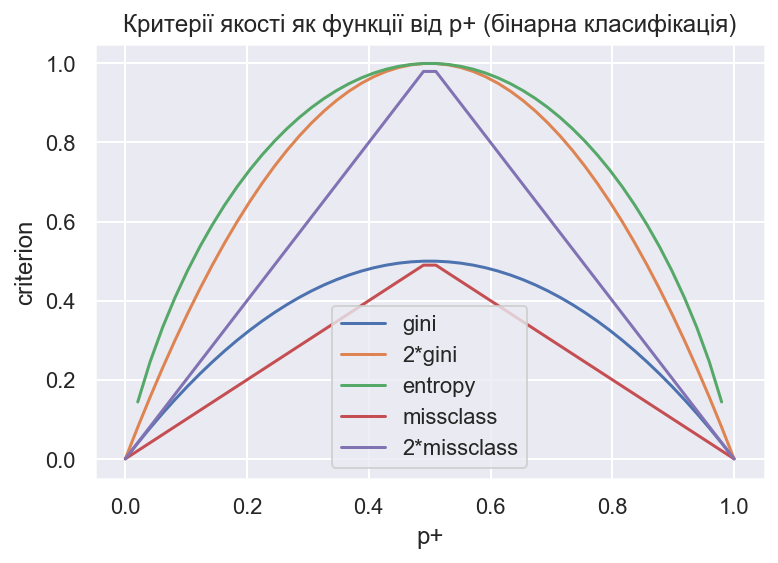

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерії якості як функції від p+ (бінарна класифікація)')
plt.legend();

#### Приклад
Розглянемо приклад застосування дерева рішень з бібліотеки Scikit-learn для синтетичних даних. Згенеруємо дані. Два класи будуть згенеровані з двох нормальних розподілів з різними середніми.

In [3]:
# перший клас
np.seed = 17
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# додаємо другий клас
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Відобразимо дані. Неформально, задача класифікації в цьому випадку – побудувати якусь "хорошу" межу, що розділяє 2 класи (червоні точки від жовтих). Грубо кажучи, машинне навчання в цьому випадку зводиться до того, як вибрати хорошу розділяючу межу. Можливо, пряма буде занадто простою межею, а якась складна крива, що огинає кожну червону точку – занадто складною і будемо багато помилятися на нових прикладах з того ж розподілу, з якого прийшла навчальна вибірка. Інтуїція підказує, що добре на нових даних буде працювати якась *гладка* межа, що розділяє 2 класу, або хоча б просто пряма (в $n$-вимірному випадку – гіперплощина).

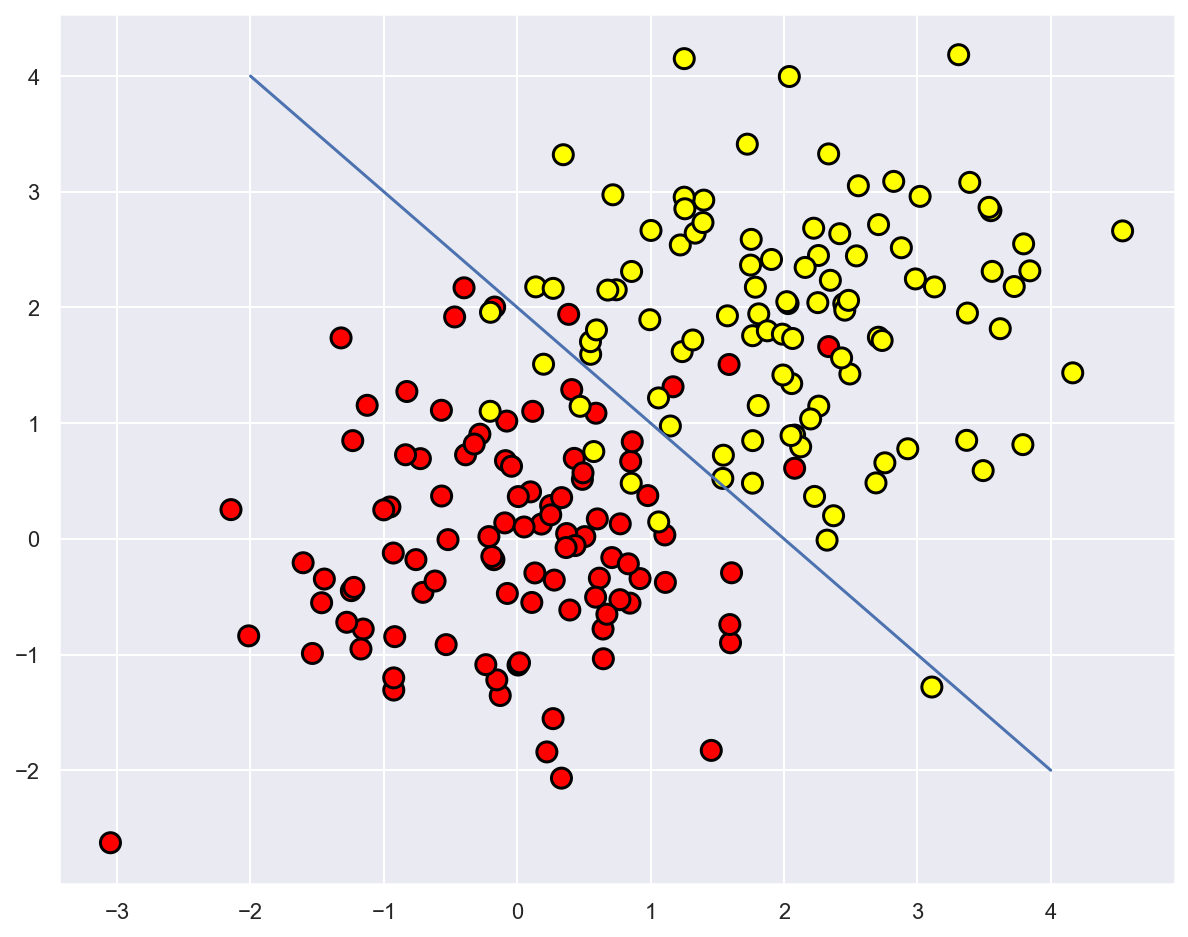

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Спробуємо розділити ці два класи, навчивши дерево рішень. У дереві будемо використовувати параметр `max_depth`, що обмежує глибину дерева. Візуалізуємо отриману межу, що розділяє класи.

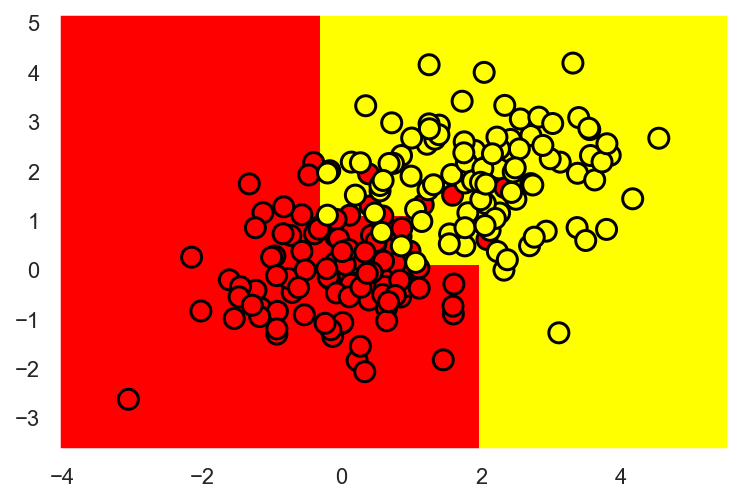

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Напишемо допоміжну функція, яка буде повертати решітку для подальшої красивою візуалізації
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# навчаємо дерево
clf_tree.fit(train_data, train_labels)

# відображення розділяючої поверхні
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

А як виглядає саме побудоване дерево? Бачимо, що дерево "нарізає" простір на 8 прямокутників (в дереві 8 листків). У кожному такому прямокутнику прогноз дерева буде константним, за переважанням об'єктів того чи іншого класу.

In [6]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [7]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='../img/topic3_decision_tree1.png')

<img src='../img/topic3_decision_tree1.png'>

#### Як "читається" таке дерево?

На початку було 200 об'єктів, 100 – одного класу і 100 – другого. Ентропія початкового стану була максимальною, $S=1$. Потім було зроблено розбиття об'єктів на 2 групи в залежності від порівняння ознаки $x_1$ зі значенням $0.986$ (знайдіть цю ділянку межі на рисунку вище, до дерева). При цьому ентропія і в лівій, і в правій групі об'єктів зменшилася. І так далі, дерево будується до глибини 3. При такій візуалізації чим більше об'єктів одного класу, тим колір вершини ближче до темно-помаранчевого і, навпаки, чим більше об'єктів другого класу, тим ближче колір до темно-синього. На початку об'єктів кожного класу порівну, тому коренева вершина дерева – білого кольору.

### Як дерево рішень працює з кількісними ознаками

Припустимо, у вибірці є кількісна ознака "Вік", яка має багато унікальних значень. Дерево рішень буде шукати краще (за критерієм типу приросту інформації) розбиття вибірки, перевіряючи бінарні ознаки виду "Вік < 17", "Вік < 22.87" і т.д. Але що якщо таких "нарізань" віку занадто багато? А що якщо є ще кількісний ознака "Зарплата", і зарплату теж можна "нарізати" великою кількістю способів? Виходить дуже багато бінарних ознак для вибору кращої на кожному кроці побудови дерева. Для вирішення цієї проблеми застосовують евристики для обмеження числа порогів, з якими ми порівнюємо кількісну ознаку.

Розглянемо це на іграшковому прикладі. Нехай є наступна вибірка:

In [8]:
data = pd.DataFrame({'Вік': [17,64,18,20,38,49,55,25,29,31,33], 
             'Неповернення кредиту': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Вік,Неповернення кредиту
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Відсортуємо її за зростання віку.

In [9]:
data.sort_values('Вік')

,Вік,Неповернення кредиту
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Навчимо на цих даних дерево рішень (без обмеження глибини) і подивимося на нього.

In [10]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Вік'].values.reshape(-1, 1), data['Неповернення кредиту'].values)

tree_graph_to_png(age_tree, feature_names=['Вік'], 
                 png_file_to_save='../img/topic3_decision_tree2.png')

<img src='../img/topic3_decision_tree2.png' width=40%>

Бачимо, що дерево задіяло 5 значень, з якими порівнюється вік: 43.5, 19, 22.5, 30 і 32 роки. Якщо придивитися, то це якраз середні значення між віками, при яких цільовий клас "змінюється" з 1 на 0 або навпаки. Тому приклад: 43.5 – це середнє між 38 і 49 роками, клієнт, якому 38 років не повернув кредит, а той, якому 49 – повернув. Аналогічно, 19 років – середнє між 18 і 20 роками. Тобто в якості порогів для "нарізання" кількісної ознаки, дерево "дивиться" на ті значення, при яких цільовий клас змінює своє значення.

Подумайте, чому не має сенсу в даному випадку розглядати ознаку "Вік < 17.5".

Розглянемо складніший приклад: додамо ознаку "Зарплата" (тис. гривень/місяць).

In [11]:
data2 = pd.DataFrame({'Вік':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [8,27,7,12,13,20,28,23,11,34,30], 
             'Неповернення кредиту': [1,0,1,0,1,0,0,1,1,0,1]})
data2

,Вік,Зарплата,Неповернення кредиту
0,17,8,1
1,64,27,0
2,18,7,1
3,20,12,0
4,38,13,1
5,49,20,0
6,55,28,0
7,25,23,1
8,29,11,1
9,31,34,0


Якщо відсортувати за віком, то цільовий клас ("Неповернення кредиту") змінюється (з 1 на 0 або навпаки) 5 разів. А якщо впорядкувати за зарплатою – то 7 разів. Як тепер дерево буде вибирати ознаки? Подивимося.

In [12]:
data2.sort_values('Вік')

,Вік,Зарплата,Неповернення кредиту
0,17,8,1
2,18,7,1
3,20,12,0
7,25,23,1
8,29,11,1
9,31,34,0
10,33,30,1
4,38,13,1
5,49,20,0
6,55,28,0


In [13]:
data2.sort_values('Зарплата')

,Вік,Зарплата,Неповернення кредиту
2,18,7,1
0,17,8,1
8,29,11,1
3,20,12,0
4,38,13,1
5,49,20,0
7,25,23,1
1,64,27,0
6,55,28,0
10,33,30,1


In [14]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Вік', 'Зарплата']].values, data2['Неповернення кредиту'].values);

In [15]:
tree_graph_to_png(tree=age_sal_tree, feature_names=['Вік', 'Зарплата'],
                  png_file_to_save='../img/topic3_decision_tree3.png')

<img src='../img/topic3_decision_tree3.png' width=40%>

Бачимо, що в дереві задіяні як розбиття за віком, так і по зарплаті. Причому пороги, з якими порівнюються ознаки: 43.5 і 22.5 роки - для віку і 32 і 10 тис. грн/міс – для зарплати. І знову можна помітити, що 32 тис. – це середнє між 30 і 34, при цьому людина з зарплатою 30 виявилася "поганою", а з 34 – "хорошою". Те ж саме для 10 тис. Тобто перебиралися порівняння зарплати і віку не з усіма можливими значеннями, а тільки з декількома. А чому в дереві опинилися саме ці ознаки? Тому що за ними розбиття виявилися кращими (за критерієм невизначеності Джині).

**Висновок:** найпростіша евристика для обробки кількісних ознак в дереві рішень: кількісна ознака сортується за зростанням, і в дереві перевіряються тільки ті пороги, при яких цільова ознака змінює значення.

Додатково, коли в даних багато кількісних ознак, і у кожної багато унікальних значень, можуть відбиратися не всі пороги, описані вище, а тільки топ-N, що дають максимальний приріст все того ж критерію. Тобто, по суті, для кожного порогу будується дерево глибини 1, обчислюється наскільки зменшилася ентропія (або невизначеність Джині) і вибираються тільки найкращі пороги, з якими варто порівнювати кількісну ознаку.

Для ілюстрації: при розбитті за ознакою "Зарплата $\leq$ 11.5" в лівій підгрупі ентропія 0 (всі клієнти "погані"), а в правій – 0.954 (3 "поганих" і 5 "хороших"). Приріст інформації виходить приблизно 0.3.
А при розбитті за ознакою "Зарплата $\leq$ 32" в лівій підгрупі ентропія 0.97 (6 "поганих" і 4 "хороших"), а в правій – 0 (всього один об'єкт). Приріст інформації виходить приблизно 0.11. Обчисливши таким чином приріст інформації для кожного розбиття, можна попередньо, до побудови великого дерева (за всіма ознаками) відібрати пороги, з якими буде порівнюватися кожна кількісна ознака.

Ще приклади дискретизації кількісних ознак можна подивитися в таких постах як ["A Simple Guide to Entropy-Based Discretization"](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) або ["Discretizing a continuous variable using Entropy"](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). Одна з найвідоміших наукових статей на цю тему – "On the handling of continuous-valued attributes in decision tree generation" (U.M. Fayyad. K.B. Irani, "Machine Learning", 1992).

### Основні гіперпараметри дерева

В принципі дерево рішень можна побудувати до такої глибини, щоб в кожному листку був рівно один об'єкт. Але на практиці це не робиться через те, що таке дерево буде *перенавченим* – воно занадто налаштується на навчальну вибірку і буде погано працювати на прогноз на нових даних. Десь внизу дерева, на великій глибині будуть з'являтися розбиття за менш важливими ознаками (наприклад, приїхав клієнт зі Львова чи Ужгорода). Грубо кажучи, може виявитися так, що з усіх 4 клієнтів, які прийшли в банк за кредитом в зелених штанах, ніхто не повернув кредит. Але ми не хочемо, щоб наша модель класифікації породжувала такі специфічні правила.

Є два винятки, коли дерева будуються до максимальної глибини:

- Випадковий ліс (композиція багатьох дерев) усереднює відповіді окремих дерев, побудованих до максимальної глибини (пізніше ми аргументуємо, чому слід це робити)
- Стрижка дерева (*pruning*). При такому підході дерево спочатку будується до максимальної глибини, потім поступово, від низу до верху, деякі вершини дерева прибираються за рахунок порівняння за якістю дерева з даним розбиттям і без нього (порівняння проводиться за допомогою *крос-валідації*, про яку буде написано нижче). 

Рисунок нижче – приклад розділяючої межі, побудованої перенавченим деревом.

<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

Основні способи боротьби з перенавчанням у випадку дерев рішень:
 - штучне обмеження глибини або мінімальної кількості об'єктів в листку: побудова дерева просто в якийсь момент припиняється;
 - стрижка дерева.

### Клас `DecisionTreeClassifier` в Scikit-learn
Основні параметри класу [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

- `max_depth` – максимальна глибина дерева;
- `max_features` – максимальна кількість ознак, за якими шукається краще розбиття в дереві (це потрібно тому, що при великій кількості ознак буде "дорого" шукати краще (за критерієм типу приросту інформації) розбиття серед *всіх* ознак);
- `min_samples_leaf` – мінімальна кількість об'єктів в листку. У цього параметра є зрозуміла інтерпретація: скажімо, якщо він дорівнює 5, то дерево буде породжувати тільки ті класифікуючі правила, які справедливі як мімімум для 5 об'єктів.

Гіперпараметри дерева треба налаштовувати в залежності від вхідних даних, і робиться це переважно за допомогою *крос-валідації*, про неї трохи нижче.

### Дерево рішень в задачі регресії
 
При прогнозуванні кількісної ознаки ідея побудови дерева залишається та ж, але змінюється критерій якості:
 
- Дисперсія навколо середнього: $$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2, $$
де $\ell$ – кількість об'єктів в листку, $y_i$ – значення цільової ознаки. Тобто, мінімізуючи дисперсію навколо середнього, ми шукаємо ознаки, які розбивають вибірку таким чином, що значення цільової ознаки в кожному листку приблизно рівні.

#### Приклад
Згенеруємо дані, розподілені навколо функції $f(x) = e^{-x ^ 2} + 1.5 \cdot e^{-(x - 2) ^ 2}$ c деякими шумом.

In [16]:
n_train = 150        
n_test = 1000       
noise = 0.1


def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [17]:
from sklearn.tree import DecisionTreeRegressor
     
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

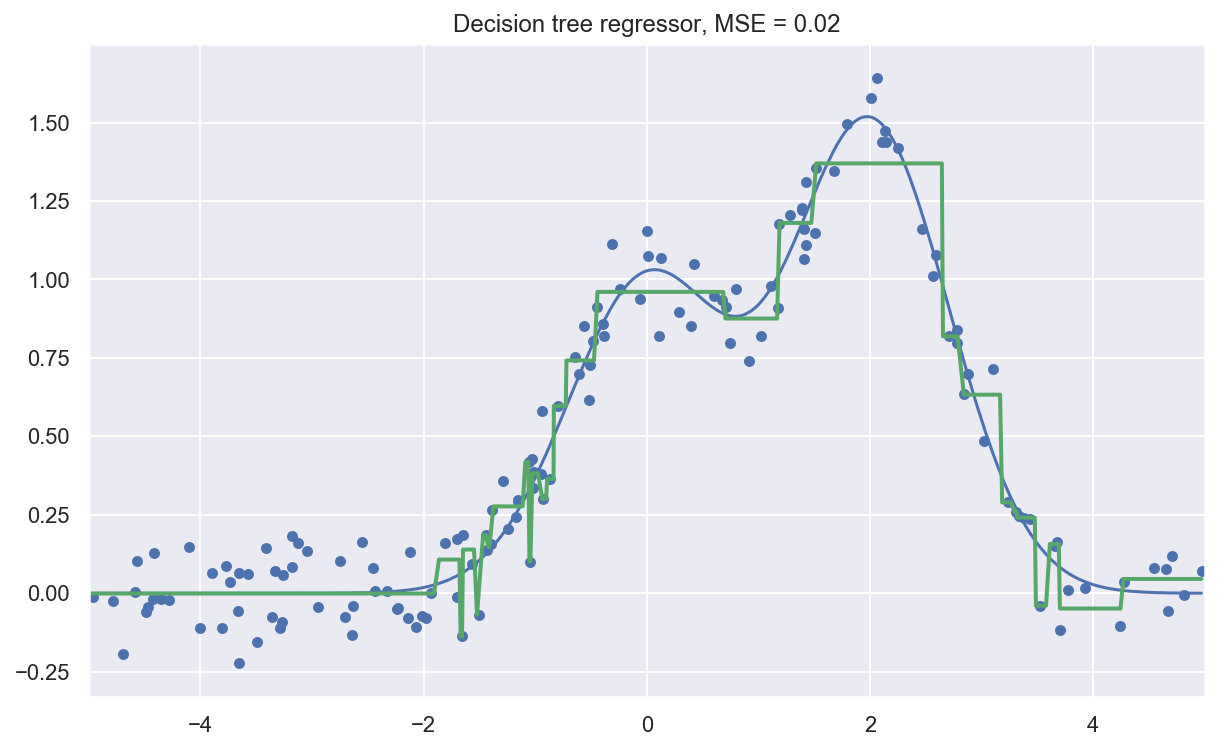

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

Бачимо, що дерево рішень апроксимує залежність в даних кусково-постійною функцією.

## 3. Метод найближчих сусідів

Метод найближчих сусідів (k Nearest Neighbors, або kNN) — теж дуже популярний метод класифікації, також іноді використовується в задачах регресії. Нарівні з деревом рішень, один з найбільш зрозумілих підходів до класифікації. На рівні інтуїції суть методу така: подивися на сусідів, які переважають, такий і ти. Формально основою методу є гіпотеза компактності: якщо метрика відстані між прикладами введена досить вдало, то схожі приклади набагато частіше лежать в одному класі, ніж в різних.

Згідно з методом найближчих сусідів, тестовий приклад (зелена кулька) буде віднесена до класу "сині", а не "червоні".

<img src="../img/topic3_knn_intuition.png"  align='center'><br>

Наприклад, якщо не знаєш, який тип товару вказати в оголошенні для Bluetooth-гарнітури, можеш знайти 5 схожих гарнітур, і якщо 4 з них віднесені до категорії "Аксесуари", і тільки один – до категорії "Техніка", то здоровий глузд підкаже для свого оголошення теж вказати категорію "Аксесуари".

Для класифікації кожного з об'єктів тестової вибірки необхідно послідовно виконати наступні операції:
 1. Обчислити відстань до кожного з об'єктів навчальної вибірки.
 2. Відібрати $k$ об'єктів навчальної вибірки, відстань до яких мінімальна.
 3. Клас об'єкта, що класифікується — це клас, який найчастіше зустрічається серед $k$ найближчих сусідів.
 
Метод досить легко адаптується для задачі регресії: на кроці 3 він повертає не клас, а число – середнє значення (або медіану) цільової змінної серед сусідів.
 
Характерна властивість такого підходу – його лінивість. Це означає, що обчислення починаються тільки в момент класифікації тестового прикладу, а заздалегідь, тільки при наявності навчальних прикладів, ніяка модель не будується. У цьому відмінність, наприклад, від раніше розглянутого дерева рішень, де спочатку на основі навчальної вибірки будується дерево, а потім відносно швидко відбувається класифікація тестових прикладів.
 
Варто відзначити, що метод найближчих сусідів – добре вивчений підхід (в машинному навчанні, економетриці та статистиці більше відомо напевно тільки про лінійну регресію). Для методу найближчих сусідів існує чимало важливих теорем, які стверджують, що на "нескінченних" вибірках це оптимальний метод класифікації. Автори класичної книги "The Elements of Statistical Learning" вважають kNN теоретично ідеальним алгоритмом, застосування якого просто обмежується обчислювальними можливостями і "прокляттям розмірності".

### Метод найближчих сусідів в реальних задачах

- У чистому вигляді kNN може послужити хорошим стартом (baseline) у вирішенні будь-якої задачі;
- У змаганнях Kaggle kNN часто використовується для побудови мета-ознак (прогноз kNN подається на вхід іншим моделям) або в стекінгу/блендінгу;
- Ідея найближчого сусіда розширюється і на інші задачі, наприклад, в рекомендаційних системах простим початковим рішенням може бути рекомендація якогось товару (або послуги), популярного серед *найближчих сусідів* людини, якій хочемо зробити рекомендацію;
- На практиці для великих вибірок часто користуються *наближеними* методами пошуку найближчих сусідів.

Якість класифікації методом найближчих сусідів залежить від декількох параметрів:

- Кількості сусідів.
- Метрики відстані між об'єктами (часто використовуються метрика Хеммінга, евклідова відстань, косинусна відстань і відстань Мінковського). Відзначимо, що при використанні більшості метрик значення ознак треба масштабувати. Умовно кажучи, щоб ознака "Зарплата" з діапазоном значень до 100 тисяч не вносила більший вклад у відстань, ніж "Вік" зі значеннями до 100.
- Ваги сусідів (сусіди тестового прикладу можуть входити з різними вагами, наприклад, чим далі приклад, тим з меншим коефіцієнтом враховується його "голос").

### Клас `KNeighborsClassifier` в Scikit-learn
Основні параметри класу [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):

- weights: `uniform` (всі ваги рівні), `distance` (вага обернено пропорційна відстані до тестового прикладу) або інша визначена користувачем функція;
- algorithm (опціонально): `brute`, `ball_tree`, `KD_tree`, або `auto`. У першому випадку найближчі сусіди для кожного тестового прикладу визначаються перебором навчальної вибірки. У другому і третьому – відстані між прикладами зберігаються в дереві, що прискорює знаходження найближчих сусідів. У разі зазначення параметра `auto` відповідний спосіб знаходження сусідів буде обраний автоматично на основі навчальної вибірки.
- leaf_size (опціонально): поріг перемикання на повний перебір в разі вибору BallTree або KDTree для знаходження сусідів;
- metric: `minkowski`, `manhattan`, `euclidean`, `chebyshev` та інші.

## 4. Вибір параметрів моделі і крос-валідація

Головна задача алгоритмів, що навчаються – їх здатність *узагальнюватися*, тобто добре працювати на нових даних. Оскільки, на нових даних ми відразу не можемо перевірити якість побудованої моделі (нам же треба для них зробити прогноз, тобто істинних значень цільового ознаки ми для них не знаємо), то треба пожертвувати невеликою порцією даних, щоб на ній перевірити якість моделі.

Найчастіше це робиться одним з 2 способів:

- відкладена вибірка (*held-out/hold-out set*). При такому підході ми залишаємо якусь частку навчальної вибірки (як правило від 20% до 40%), навчаємо модель на інших даних (60-80% вихідної вибірки) і обчислюємо деяку метрику якості моделі (наприклад, найпростіше – частку правильних відповідей в задачі класифікації) на відкладеній вибірці.
- крос-валідація (*cross-validation*, на українську ще перекладають як перехресна перевірка). Тут найчастіший випадок – K-fold крос-валідація.

 <img src='../img/cross_validation.png' align='center' width=90%><br>

Тут модель навчається $K$ разів на різних ($K-1$) підвибірках вихідної вибірки (білий колір), а перевіряється на одній підвибірці (кожен раз на іншій, помаранчевий колір). Отримуються $K$ оцінок якості моделі, які переважно усереднюються, і видається середня оцінка якості класифікації/регресії на крос-валідації.

Крос-валідація дає кращу в порівнянні з відкладеною вибіркою оцінку якості моделі на нових даних. Але крос-валідація обчислювально дорога процедура, якщо даних багато.

Крос-валідація – дуже важлива техніка в машинному навчанні (застосовується також у статистиці і економетриці), з її допомогою вибираються гіперпараметри моделей, порівнюються моделі між собою, оцінюється корисність нових ознак в задачі і т.д. Більш докладно можна почитати, наприклад, [тут](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) у Sebastian Raschka або в будь-якому класичному підручнику по машинному (статистичному) навчанню.

## 5. Приклади застосування та складні випадки

### Дерева рішень і метод найближчих сусідів в задачі прогнозування відтоку клієнтів телеком-оператора

Зчитаємо дані в `DataFrame` і проведемо попередню обробку. *Штати* поки збережемо в окремий об'єкт `Series`, але видалимо з датафрейму. Першу модель будемо навчати без ознаки *Штати*, потім подивимося, чи вона допомагає.

In [19]:
df = pd.read_csv('../data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [20]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Виділимо 70% вибірки (`X_train`, `y_train`) під навчання і 30% будуть відкладеною вибіркою (`X_holdout`, `y_holdout`). Відкладена вибірка ніяк не братиме участі в налаштуванні параметрів моделей. Ми будемо використовувати її в кінці, після налаштування, щоб оцінити якість отриманої моделі.

Навчимо 2 моделі – дерево рішень і kNN, поки не знаємо, які параметри хороші, тому задамо навмання: глибину дерева – 5, кількість найближчих сусідів – 10.

#### Основи API статистичного оцінювання

Всі алгоритми машинного навчання в бібліотеці `Scikit-Learn` реалізуються через API статистичного оцінювання, що надає однаковий інтерфейс для широкого діапазону прикладних задач машинного навчання. Найчастіше використання API статистичного оцінювання бібліотеки `Scikit-Learn` включає наступні кроки:
1. Вибір класу моделі за допомогою імпорту відповідного класу з бібліотеки `Scikit-Learn`.
2. Вибір гіперпараметрів моделі шляхом створення екземпляра цього класу з відповідними значеннями.
3. Компонування даних в матрицю ознак і цільовий вектор.
4. Навчання моделі на своїх даних за допомогою виклику методу `fit()` екземпляра моделі.
5. Застосування моделі до нових даних: 
 - y випадку машинного навчання з вчителем мітки для невідомих даних зазвичай прогнозують за допомогою методу `predict()`;
 - y випадку машинного навчання без вчителя виконується перетворення властивостей даних або виведення їх значень за допомогою методів `transform()` або `predict()`.
---

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# для kNN, нам потрібно масштабувати ознаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Якість прогнозування будемо перевіряти за допомогою простої метрики – частки правильних відповідей (accuracy). Зробимо прогнози для відкладеної вибірки.

In [22]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.94

In [23]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred) # 0.89

0.89

Дерево рішень впоралося краще: частка правильних відповідей 94% проти 89% у kNN. Але це ми поки вибирали параметри навмання.

Тепер налаштуємо параметри дерева на крос-валідації. Налаштовувати будемо максимальну глибину і максимальну кількість ознак, що використовується при кожному розбитті. Суть того, як працює `GridSearchCV`: для кожної унікальної пари значень параметрів `max_depth` і `max_features` буде проведена 5-кратна крос-валідація і вибереться найкраще поєднання параметрів.

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   10.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

Краще поєднання параметрів і відповідна середня частка правильних відповідей на крос-валідації:

In [25]:
tree_grid.best_params_ #{'max_depth': 6, 'max_features': 17}

{'max_depth': 6, 'max_features': 17}

In [26]:
tree_grid.best_score_ #0.943

0.9425632233176168

In [27]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) #0.946

0.946

Давайте відобразимо отримане дерево. Оскільки його максимальна глибина – 6, то рисунок не такий вже й малий. Його можна відкрити окремо і «пройтися» по дереву, збільшивши масштаб.

In [28]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns,
                 png_file_to_save='../img/topic3_decision_tree4.png')

<img src='../img/topic3_decision_tree4.png'>

Тепер спробуємо налаштувати кількість сусідів $k$ в алгоритмі kNN.

Велика частина проектів машинного навчання вимагає не разового використання якогось одного алгоритму, а застосування різних операцій попередньої обробки і моделей машинного навчання, об'єднаних в ланцюжок. Клас Pipeline використовується для того, щоб спростити процес побудови [ланцюжків перетворень і моделей](http://www.williamspublishing.com/PDF/978-5-9908910-8-1/part.pdf).

In [29]:
from sklearn.pipeline import Pipeline

# Створюємо об'єкт-конвеєр, передавши йому список необхідних етапів. 
# Кожен етап представляє собою кортеж, що містить ім'я та екземпляр моделі.
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


({'knn__n_neighbors': 7}, 0.8859837119588513)

In [30]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) # 0.89

0.89

У цьому прикладі дерево рішень показало себе краще, ніж метод найближчих сусідів: 94.3% правильних відповідей на крос-валідації і 94.6% на відкладеній вибірці. Більш того, в даній задачі дерево проявляє себе дуже добре, і навіть випадковий ліс (поки уявляємо просто як купу дерев, які разом працюють чомусь набагато краще, ніж одне дерево) в цьому прикладі показує частку правильних відповідей не набагато вищу (95.1% на крос-валідації і 95.3% – на відкладеній вибірці), а навчається набагато довше.

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9494233119813256


In [32]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished


({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [33]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.953

### Складний випадок для дерев рішень
Продовжуючи обговорення плюсів і мінусів, наведемо дуже простий приклад задачі класифікації, з яким дерево справляється, але робить все якось "складніше", ніж хотілося б. Створимо множину точок на площині (2 ознаки), кожна точка буде належати до одного з класів (+1 – червоні, або -1 – жовті). Якщо дивитися на це як на задачу класифікації, то ніби все дуже просто – класи розділяються прямою.

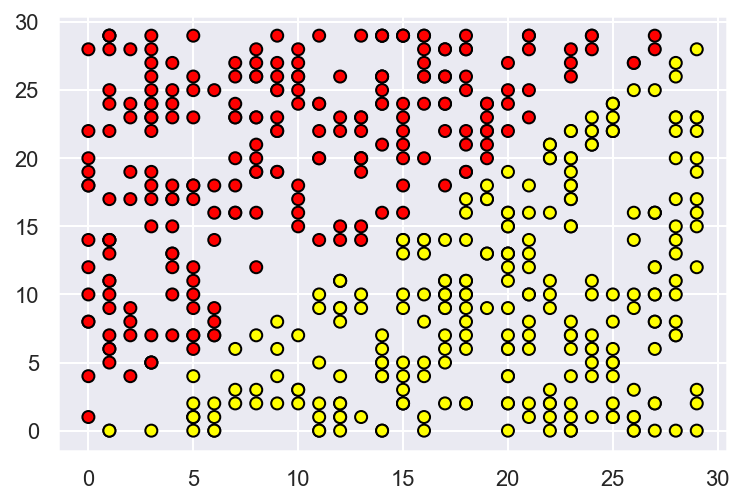

In [34]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

Однак дерево рішень будує аж надто складну межу і саме по собі виявляється глибоким. Крім того, уявіть, як погано дерево буде узагальнюватися на простір зовні представленого квадрата $30 \times 30$, що обрамляє навчальну вибірку.

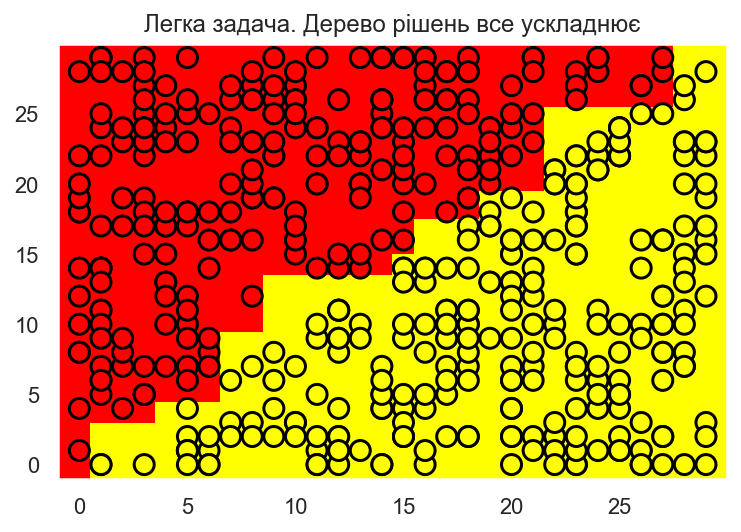

In [35]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Легка задача. Дерево рішень все ускладнює');

Ось така складна конструкція, хоча рішенням є просто пряма $x_1 = x_2$.

In [36]:
tree_graph_to_png(tree=tree, feature_names=['x1', 'x2'],
         png_file_to_save='../img/topic3_decision_tree5.png')

<img src='../img/topic3_decision_tree5.png'>

Метод одного найближчого сусіда тут справляється ніби краще дерева, але все ж не так добре, як лінійний класифікатор (наша наступна тема).

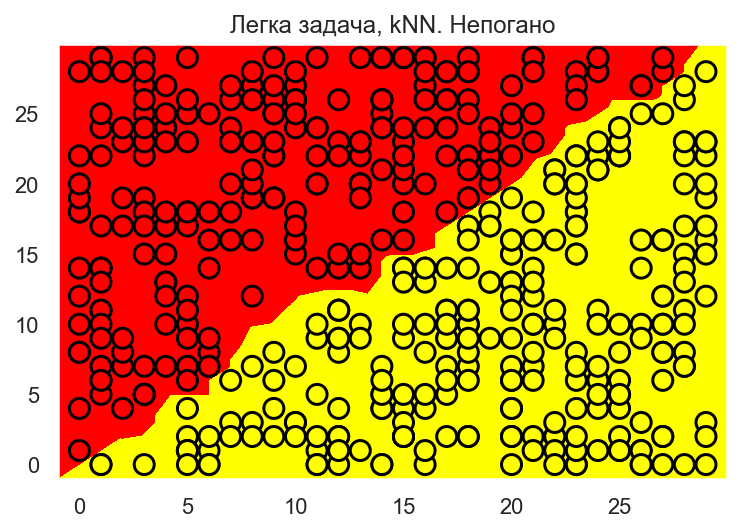

In [37]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Легка задача, kNN. Непогано');

### Складний випадок для методу найближчих сусідів
Тепер розглянемо ще один простий приклад. У задачі класифікації одна з ознак буде просто пропорційна вектору відповідей, але методу найближчих сусідів це не допоможе.

In [38]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # перша ознака пропорційна цільовій
    x1 = 0.3 * y

    # решта ознак - шум
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

Як завжди, будемо дивитися на частку правильних відповідей на крос-валідації і на відкладеній вибірці. Побудуємо криві, що відображають залежність цих величин від параметра `n_neighbors` в методі найближчих сусідів. Такі криві називаються кривими валідації.

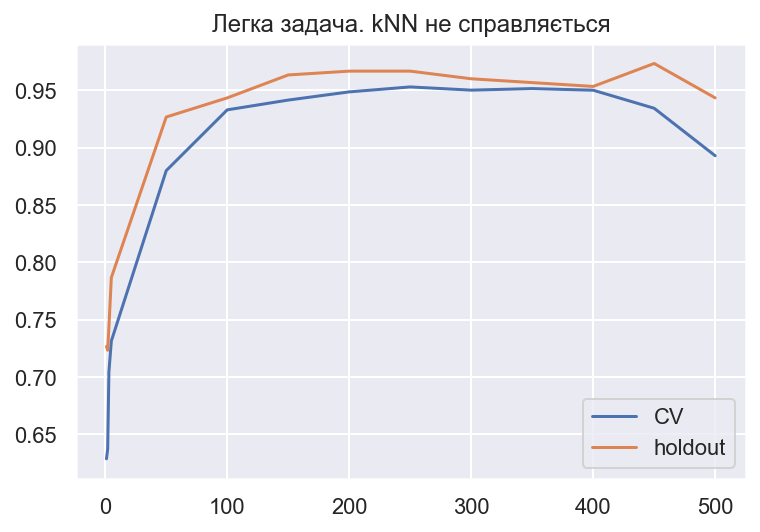

In [39]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Легка задача. kNN не справляється')
plt.legend();

Бачимо, що метод найближчих сусідів з евклідової метрикою не справляється із завданням, навіть якщо змінюватии кількість найближчих сусідів в широкому діапазоні. Навпаки, дерево рішень легко "виявляє" приховану залежність в даних при будь-якому обмеженні на максимальну глибину.

In [40]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Дерево рішень. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Дерево рішень. CV: 1.0, holdout: 1.0


Отже, у другому прикладі дерево впоралося з завданням ідеально, а метод найближчих сусідів мав труднощі. Втім, це мінус скоріше не методу, а евклідової метрики, що використовувалась: в даному випадку вона не дозволила виявити, що одна ознака набагато краща за інші.

### Дерева рішень і метод найближчих сусідів в задачі розпізнавання рукописних цифр MNIST

Тепер подивимося на описані 2 алгоритми в реальній задачі. Будемо використовувати "вбудовані" в `sklearn` дані по рукописних цифрах. Ця задача буде прикладом, коли метод найближчих сусідів працює на диво добре.

Рисунки тут представлені матрицею 8x8 (інтенсивності білого кольору для кожного пікселя). Далі ця матриця "розвертається" у вектор довжини 64, отримуємо ознаковий опис об'єкта.

Намалюємо кілька рукописних цифр. Бачимо, що вони відгадуються.

In [41]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

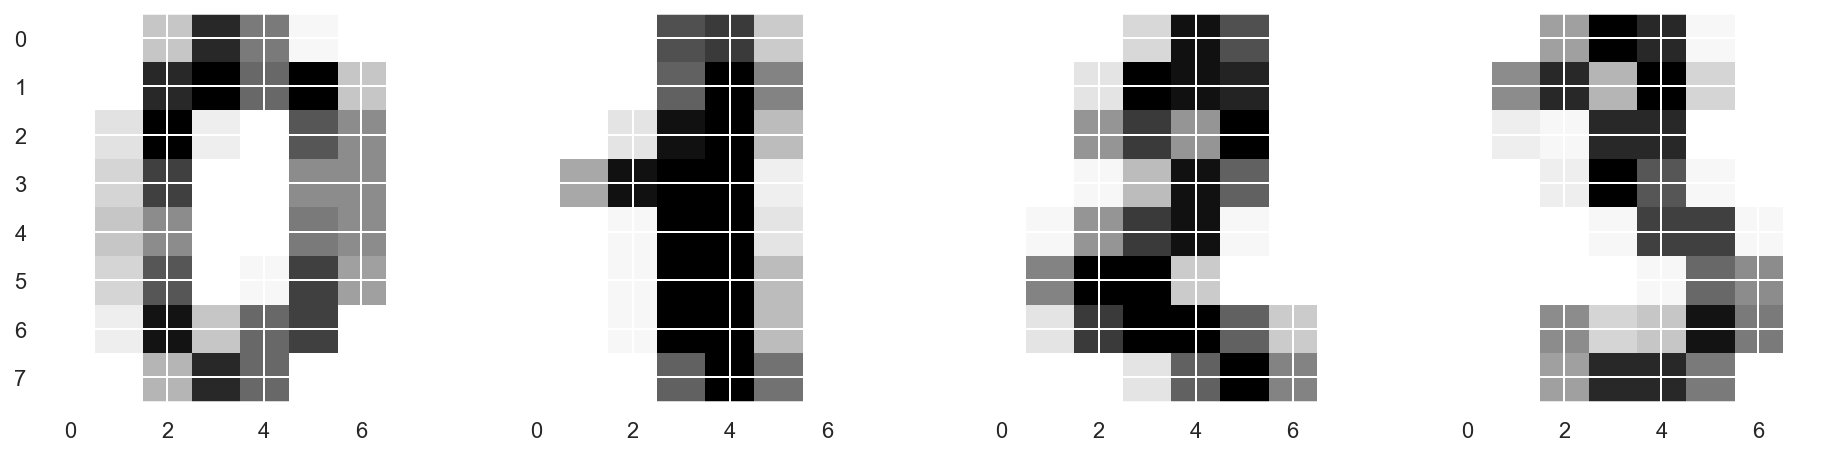

In [42]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

Виділимо 70% вибірки (`X_train`, `y_train`) під навчання і 30% будуть відкладеною вибіркою (`X_holdout`, `y_holdout`). Відкладена вибірка ніяк не братиме участі в налаштуванні параметрів моделей. Ми будемо використовувати її в кінці, після налаштування, щоб оцінити якість отриманої моделі.

In [44]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

Навчимо дерево рішень і kNN, знову параметри беремо поки навмання.

In [45]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

Зробимо прогнози для відкладеної вибірки. Бачимо, що метод найближчих сусідів впорався набагато краще. Але це ми поки вибирали параметри навмання.

In [46]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.976, 0.667)

(0.975925925925926, 0.6666666666666666)

Тепер так само, як раніше налаштуємо параметри моделей на крос-валідації, тільки врахуємо, що ознак зараз більше, ніж в минулій задачі – 64.

In [47]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    7.1s finished
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 3

Краще сполучення параметрів і відповідна середня частка правильних відповідей на крос-валідації:

In [48]:
tree_grid.best_params_, tree_grid.best_score_ # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

Це вже не 66.7%, але і не 97.6%. Метод найближчих сусідів на цьому наборі даних працює краще. У разі одного найближчого сусіда на крос-валідації досягається майже 99% вгадувань.

In [49]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) # 0.987

0.9865458422397149

Навчимо на цих же даних випадковий ліс, він на більшості вибірок працює краще, ніж метод найближчих сусідів. Але зараз у нас виняток.

In [50]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) # 0.935

0.9349085619110404

Ви матимете рацію, якщо заперечите, що ми тут не налаштовували параметри RandomForestClassifier, але навіть з налаштуванням частка правильних відповідей не досягає 98%, як для у методу одного найближчого сусіда.

Результати експерименту:

|algo\eval|   CV  | Holdout |  
|---------|-------|---------|
| **DT**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |
| **RF**  | 0.935 |  0.941  | 


Позначення: CV та Holdout – середні частки правильних відповідей моделі на крос-валідації і відкладеній вибірці відповідно. DT – дерево рішень, kNN – метод найближчих сусідів, RF – випадковий ліс.

**Висновок** з цього експерименту (і загальна порада): на початку перевіряйте на своїх даних прості моделі – дерево рішень і метод найближчих сусідів (а наступного разу сюди додасться логістична регресія), може виявитися, що вже вони працюють досить добре.

## 6. Плюси і мінуси дерев рішень та методу найближчих сусідів

### Дерева рішень

Плюси:

- Породження чітких правил класифікації, зрозумілих людині, наприклад, "якщо вік < 25 та інтерес до мотоциклів, то відмовити в кредиті". Це властивість називають інтерпретованість моделі;
- Дерева рішень можуть легко візуалізуватися, тобто може "інтерпретуватися" як сама модель (дерево), так і прогноз для окремо взятого тестового об'єкта (шлях в дереві);
- Швидкі процеси навчання і прогнозування;
- Мала кількість параметрів моделі;
- Підтримка і кількісних, і категоріальних ознак.
 
Мінуси:

- У породження чітких правил класифікації є й інша сторона: дерева дуже чутливі до шумів у вхідних даних, вся модель може кардинально змінитися, якщо трохи зміниться навчальна вибірка (наприклад, якщо прибрати одну з ознак або додати кілька об'єктів), тому і правила класифікації можуть сильно змінюватися, що погіршує інтерпретованість моделі;
- Розділяюча межа, побудована деревом рішень, має свої обмеження (складається з гіперплощин, перпендикулярних якійсь із координатней осей), і на практиці дерево рішень за якістю класифікації поступається деяким іншим методам;
- Необхідність відсікати гілки дерева (pruning) або встановлювати мінімальну кількість елементів в листку дерева або максимальну глибину дерева для боротьби з перенавчанням. Втім, перенавчання – проблема всіх методів машинного навчання;
- Нестабільність. Невеликі зміни в даних можуть суттєво змінювати побудоване дерево рішень. З цією проблемою борються за допомогою ансамблів дерев рішень (розглянемо далі);
- Проблема пошуку оптимального дерева рішень (мінімального за розміром і здатного без помилок класифікувати вибірку) NP-повна, тому на практиці використовуються евристики типу жадібного пошуку ознаки з максимальним приростом інформації, які не гарантують знаходження глобально оптимального дерева;
- Складно підтримуються пропуски в даних. Friedman оцінив, що на підтримку пропусків в даних пішло близько 50% коду CART (класичний алгоритм побудови дерев класифікації і регресії – Classification And Regression Trees, в `sklearn` реалізована поліпшена версія саме цього алгоритму);
- Модель вміє тільки інтерполювати, але не екстраполювати (це ж вірно і для лісу та бустінга на деревах). Тобто дерево рішень робить константний прогноз для об'єктів, що перебувають у просторі ознак поза паралелепіпедом, що охоплює всі об'єкти навчальної вибірки. У нашому прикладі з жовтими і синіми кульками це означає, що модель дає однаковий прогноз для всіх кульок з координатою > 19 або < 0.

### Метод найближчих сусідів

Плюси:

- Проста реалізація;
- Можна адаптувати під потрібну задачу вибором метрики або ядра (в двох словах: ядро може задавати операцію подібності для складних об'єктів типу графів, а сам підхід kNN залишається тим самим);
- Непогана інтерпретованість, можна пояснити, чому тестовий приклад був класифікований саме так. Хоча цей аргумент можна атакувати: якщо кількість сусідів велика, то інтерпретованість погіршується (умовно: "ми не дали йому кредит, тому що він схожий на 350 клієнтів, з яких 70 – погані, що на 12% більше, ніж в середньому по вибірці").
 
Мінуси:

- Метод вважається швидшим у порівнянні, наприклад, з композиціями алгоритмів, але в реальних задачах, як правило, кількість сусідів, які використовуються для класифікації, буде велика (100-150), і в такому випадку алгоритм буде працювати не так швидко, як дерево рішень;
- Якщо в наборі даних багато ознак, то важко підібрати відповідні ваги і визначити, які ознаки не важливі для класифікації/регресії;
- Залежність від обраної метрики відстані між прикладами. Вибір за замовчуванням евклідової відстані найчастіше нічим не обгрунтований. Можна відшукати хороший розв'язок перебором параметрів, але для великого набору даних це забирає багато часу;
- Немає теоретичних підстав вибору певної кількості сусідів – тільки перебір (втім, найчастіше це вірно для всіх гіперпараметрів всіх моделей). У разі малої кількості сусідів метод чутливий до викидів, тобто схильний перенавчатися;
- Як правило, погано працює, коли ознак багато, через "прокляття розмірності". Про це добре розповідає відомий в ML-співтоваристві професор Pedro Domingos - [тут](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) в популярній статті "A Few Useful Things to Know about Machine Learning ", також "the curse of dimensionality" описується в книзі Deep Learning в [розділі](http://www.deeplearningbook.org/contents/ml.html) "Machine Learning Basics".

## 7. Корисні ресурси

- [Scikit-learn](https://scikit-learn.org/stable/index.html) бібліотека. Офіційна документація.
- [Реалізації](https://github.com/rushter/MLAlgorithms) багатьох алгоритмів машинного навчання. 